In [42]:
#EXAMPLE SCRIPT - EDIT FILE NAMES AND VARIABLES AS NECESSARYimport numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
sc.logging.print_versions()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import palantir
import tkinter
import harmony

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
MulticoreTSNE       NA
PIL                 8.0.1
attr                20.3.0
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.3
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
fa2                 NA
fcsparser           0.2.2
h5py                2.10.0
harmony   

In [2]:
sct_normalized_matrix = './cardio_SCT_normalized.txt'
counts = pd.read_csv(sct_normalized_matrix, sep=',', index_col=0).transpose()
counts = counts.sort_index()
counts

,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,MXRA8,MMP23B,CDK11B,GABRD,HES5,...,ITGB2-AS1,COL18A1,COL6A1,COL6A2,S100B,MT-ND2,MT-CO1,MT-ND5,MT-ND6,AC233755.1
H_ZC-11-292_AAACCTGTCATCGCTC,-0.311436,-0.201189,-0.232595,-0.051972,-0.194643,-0.450108,-0.328487,2.059860,-0.049568,-0.034263,...,-0.177449,-0.666466,-0.754597,-0.828566,-0.113428,0.553124,-0.075820,-0.774423,-0.416498,-0.005798
H_ZC-11-292_AAACGGGAGCAAATCA,-0.255890,-0.144352,-0.189365,-0.035611,-0.143560,-0.371510,-0.261193,-0.281206,-0.041230,-0.028504,...,-0.122380,-0.550524,-0.610986,-0.655446,-0.088170,-0.529112,-0.803119,0.921478,-0.339208,-0.005312
H_ZC-11-292_AAACGGGAGCAACGGT,-0.227129,-0.110723,-0.167058,-0.025548,-0.112809,-0.330227,-0.226142,-0.246232,-0.037028,-0.025578,...,-0.088409,-0.483794,-0.522890,-0.544920,-0.074377,1.581135,-0.411826,-0.080644,-0.298660,-0.005015
H_ZC-11-292_AAACGGGAGCCCAATT,4.397746,-0.188441,-0.270080,-0.041637,-0.175621,-0.516146,-0.385914,-0.405673,-0.057058,-0.039409,...,-0.145048,-0.718326,-0.042139,-0.765045,-0.121027,-0.711507,-0.152514,-0.190425,-0.481579,-0.006150
H_ZC-11-292_AAACGGGCAGGTCCAC,-0.248461,-0.119984,-0.183599,-0.026746,-0.119609,-0.360877,-0.252150,-0.272183,-0.040138,-0.027745,...,-0.093342,-0.523794,-0.560482,-0.577435,-0.080845,-0.514556,0.029385,1.298649,-0.328761,-0.005239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWCM-LVAD3_TTTGGTTAGTGTGGCA,-0.368990,-0.196373,-0.277669,-0.043774,-0.182503,-0.529225,3.232180,-0.417152,-0.058610,-0.040474,...,-0.152073,-0.734129,0.566377,-0.186295,-0.125127,-0.726397,-0.211839,-0.226750,-0.494488,-0.006215
TWCM-LVAD3_TTTGGTTGTACACCGC,-0.243327,-0.112690,-0.179616,-0.024433,-0.112803,-0.353515,-0.245896,-0.265943,-0.039387,-0.027222,...,-0.085611,-0.511145,-0.542544,-0.553725,-0.078069,-0.504400,0.559458,0.011658,-0.321530,-0.005187
TWCM-LVAD3_TTTGGTTTCTGATACG,-0.347610,-0.196337,-0.260886,-0.046053,-0.185155,-0.500164,-0.371923,1.625337,-0.055195,-0.038130,...,-0.159158,-0.709489,-0.763816,-0.797173,-0.120261,-0.692930,-0.350401,0.278521,-0.465814,-0.006068
TWCM-LVAD3_TTTGTCAAGTGAATTG,-0.364469,-0.215867,-0.274116,-0.052037,-0.202972,-0.523115,-0.392036,-0.411783,-0.057882,-0.039974,...,-0.178774,-0.741183,-0.804671,-0.849013,-0.128745,-0.719476,-0.009504,-0.555168,-0.488457,-0.006185


In [38]:
meta_data = pd.read_csv('./cardio_meta.csv', index_col=0)
meta_data = meta_data.sort_index()
meta_data

,orig_ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,SCT_snn_res.0.03,SCT_snn_res.0.04,SCT_snn_res.0.05,SCT_snn_res.0.06,...,Age_Group_Tertile,Names,SCT_snn_res.0.01,SCT_snn_res.0.02,nCount_prediction.score.celltype.l1,nFeature_prediction.score.celltype.l1,nCount_prediction.score.celltype.l2,nFeature_prediction.score.celltype.l2,Cm_Names,CondIdent
H_ZC-11-292_AAACCTGTCATCGCTC,H_ZC-11-292,4658,1862,0.536711,2794,1772,2,2,2,2,...,Old,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,Donor_H_ZC-11-292
H_ZC-11-292_AAACGGGAGCAAATCA,H_ZC-11-292,2400,944,0.333333,2283,944,2,2,2,2,...,Old,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,Donor_H_ZC-11-292
H_ZC-11-292_AAACGGGAGCAACGGT,H_ZC-11-292,1620,692,0.185185,1980,692,2,2,2,2,...,Old,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,Donor_H_ZC-11-292
H_ZC-11-292_AAACGGGAGCCCAATT,H_ZC-11-292,7737,2338,0.090474,2516,1417,2,2,2,2,...,Old,Cardiomyocytes,2,2,0,0,0,0,Cm6 - NPPA/NPPB,Donor_H_ZC-11-292
H_ZC-11-292_AAACGGGCAGGTCCAC,H_ZC-11-292,2177,878,0.137804,2182,878,2,2,2,2,...,Old,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,Donor_H_ZC-11-292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWCM-LVAD3_TTTGGTTAGTGTGGCA,TWCM-LVAD3,8531,2995,0.105498,2700,1712,2,2,2,2,...,Middle,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,DCM_TWCM-LVAD3
TWCM-LVAD3_TTTGGTTGTACACCGC,TWCM-LVAD3,2032,842,0.098425,2095,842,2,2,2,2,...,Middle,Cardiomyocytes,2,2,0,0,0,0,Cm4 - ADGRL3,DCM_TWCM-LVAD3
TWCM-LVAD3_TTTGGTTTCTGATACG,TWCM-LVAD3,6860,1939,0.247813,2783,1350,2,2,2,2,...,Middle,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,DCM_TWCM-LVAD3
TWCM-LVAD3_TTTGTCAAGTGAATTG,TWCM-LVAD3,8151,2677,0.331248,2754,1610,2,2,2,2,...,Middle,Cardiomyocytes,2,2,0,0,0,0,Cm2 - ACTA1,DCM_TWCM-LVAD3


In [7]:
fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(counts)

In [8]:
pca_projections, _ = palantir.utils.run_pca(counts, use_hvg=False)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res) #n_eigs=5
tsne = palantir.utils.run_tsne(ms_data)

Determing nearest neighbor graph...


In [23]:
fdl = harmony.plot.force_directed_layout(dm_res['kernel'], counts.index.values)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [15:59<00:00,  1.92s/it]

BarnesHut Approximation  took  211.27  seconds
Repulsion forces  took  715.31  seconds
Gravitational forces  took  2.95  seconds
Attraction forces  took  15.36  seconds
AdjustSpeedAndApplyForces step  took  7.73  seconds


In [10]:
fig, ax = palantir.plot.plot_tsne(tsne)
plt.savefig('tsne.png')

In [11]:
fig, ax = palantir.plot.plot_tsne_by_cell_sizes(counts, tsne)
plt.savefig('tsne_counts.png')

In [12]:
imp_df = palantir.utils.run_magic_imputation(counts, dm_res)

In [13]:
palantir.plot.plot_diffusion_components(tsne, dm_res)
plt.savefig('tsne_diff_components.png')

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


In [25]:
palantir.plot.plot_cell_clusters(fdl, meta_data["Cm_Names"])
plt.savefig('fdl_annotations.png')

In [26]:
palantir.plot.plot_cell_clusters(fdl, meta_data["condition"])
plt.savefig('fdl_condition.png')

In [19]:
palantir.plot.plot_cell_clusters(tsne, meta_data["condition"])
plt.savefig('tsne_condition.png')

KeyError: "None of [Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',\n       ...\n       '47050', '47051', '47052', '47053', '47054', '47055', '47056', '47057',\n       '47058', '47059'],\n      dtype='object', length=47060)] are in the [index]"

In [28]:
start_cell = "TWCM-13-96_TCTTCGGAGCCACTAT"
palantir.plot.highlight_cells_on_tsne(fdl, [start_cell])
plt.savefig('fdl_start_cell.png')

In [29]:
list1=counts.index.values.tolist()
ms_data.index=list1
ms_data

,0,1,2
H_ZC-11-292_AAACCTGTCATCGCTC,-0.071976,0.459360,-0.152989
H_ZC-11-292_AAACGGGAGCAAATCA,-0.064433,0.350535,-0.117321
H_ZC-11-292_AAACGGGAGCAACGGT,-0.054814,0.190717,-0.076491
H_ZC-11-292_AAACGGGAGCCCAATT,-0.087890,0.675182,-0.119854
H_ZC-11-292_AAACGGGCAGGTCCAC,-0.081474,0.585001,-0.200357
...,...,...,...
TWCM-LVAD3_TTTGGTTAGTGTGGCA,-0.033985,0.010602,0.004376
TWCM-LVAD3_TTTGGTTGTACACCGC,-0.036795,0.011449,0.000476
TWCM-LVAD3_TTTGGTTTCTGATACG,-0.052687,0.167579,-0.056249
TWCM-LVAD3_TTTGTCAAGTGAATTG,-0.036957,0.006308,-0.003522


In [30]:
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=1000)

Sampling and flocking waypoints...
Time for determining waypoints: 0.2627596855163574 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.572943623860677 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [32]:
lst = []
for i in pr_res.branch_probs.columns:
    print(meta_data.Cm_Names[i])
    lst.append(meta_data.Cm_Names[i])

pr_res.branch_probs.columns = lst
pr_res.branch_probs = pr_res.branch_probs.loc[:, lst]

Cm2 - ACTA1
Cm6 - NPPA/NPPB
Cm3 - MYL7


In [33]:
palantir.plot.plot_palantir_results(pr_res, fdl)
plt.savefig('palantir_summary.png')

In [67]:
df


,MonoD28_TGCGCAGTCTTCGGTC-1,MonoD3_ACGGCCAGTAGAAGGA-1,MonoD3_CAAGAAAGTGCGATAG-1,MonoD7_GTCACAACATGTCCTC-1,pseudotime,entropy,ClusterName,Condition
MonoD13_AAACCTGAGCGATCCC-1,0.571238,0.029186,0.166785,0.232791,0.509674,1.061049,MHC_High,MonoD13
MonoD13_AAACCTGAGGCAGTCA-1,0.440454,0.038028,0.217303,0.304215,0.519599,1.179206,Lyve1,MonoD13
MonoD13_AAACCTGCATCCCATC-1,0.299583,0.046460,0.265483,0.388474,0.481260,1.223097,Trem2,MonoD13
MonoD13_AAACCTGCATTCCTCG-1,0.371367,0.042899,0.245132,0.340603,0.489879,1.214435,Cxcl1,MonoD13
MonoD13_AAACCTGGTAAATACG-1,0.476905,0.035609,0.203486,0.284000,0.483772,1.153357,DCs,MonoD13
...,...,...,...,...,...,...,...,...
MonoD7_TTTGTCAGTTCGCGAC-1,0.304282,0.045997,0.262841,0.386880,0.537449,1.222275,Trem2,MonoD7
MonoD7_TTTGTCATCATCACCC-1,0.402353,0.040759,0.232907,0.323981,0.499346,1.201266,MHC_High,MonoD7
MonoD7_TTTGTCATCGATAGAA-1,0.000000,0.999945,0.000000,0.000000,0.964117,0.000633,Ccrl2_Neutrophils,MonoD7
MonoD7_TTTGTCATCTGGAGCC-1,0.310825,0.046066,0.263233,0.379875,0.494633,1.224011,Cxcl1,MonoD7


In [79]:
pr_res.branch_probs

,MonoD28_TGCGCAGTCTTCGGTC-1,MonoD3_ACGGCCAGTAGAAGGA-1,MonoD3_CAAGAAAGTGCGATAG-1,MonoD7_GTCACAACATGTCCTC-1,pseudotime,entropy,ClusterName,Condition
MonoD13_AAACCTGAGCGATCCC-1,0.572615,0.031859,0.166359,0.229167,0.516601,1.065072,MHC_High,MonoD13
MonoD13_AAACCTGAGGCAGTCA-1,0.416252,0.044008,0.229799,0.309942,0.525370,1.203271,Lyve1,MonoD13
MonoD13_AAACCTGCATCCCATC-1,0.305302,0.055104,0.287749,0.351844,0.495535,1.247913,Trem2,MonoD13
MonoD13_AAACCTGCATTCCTCG-1,0.351688,0.050623,0.264344,0.333346,0.481463,1.236459,Cxcl1,MonoD13
MonoD13_AAACCTGGTAAATACG-1,0.453219,0.041082,0.214524,0.291175,0.489453,1.179295,DCs,MonoD13
...,...,...,...,...,...,...,...,...
MonoD7_TTTGTCAGTTCGCGAC-1,0.311247,0.054469,0.284429,0.349856,0.539975,1.246823,Trem2,MonoD7
MonoD7_TTTGTCATCATCACCC-1,0.374501,0.048283,0.252123,0.325092,0.511304,1.226823,MHC_High,MonoD7
MonoD7_TTTGTCATCGATAGAA-1,0.000000,0.999971,0.000000,0.000000,0.964314,0.000347,Ccrl2_Neutrophils,MonoD7
MonoD7_TTTGTCATCTGGAGCC-1,0.315557,0.054349,0.283802,0.346293,0.494724,1.246926,Cxcl1,MonoD7


In [49]:
df = pd.DataFrame()
df = pr_res.branch_probs
df['pseudotime'] = np.array(pr_res.pseudotime)
df['entropy'] = np.array(pr_res.entropy)
df['ClusterName'] = meta_data.Cm_Names
df['Condition'] = meta_data.condition
df['ClusterName'] = df['ClusterName'].astype("category")

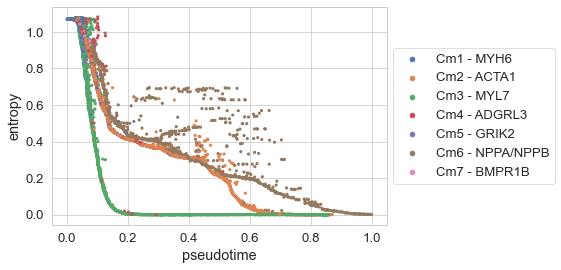

In [50]:
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="ClusterName", data=df, s=10,linewidth=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_annotation.png', bbox_inches='tight')

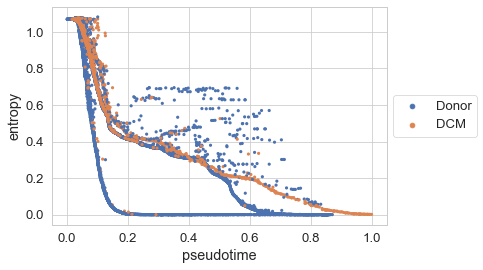

In [51]:
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="Condition", data=df, s=10,linewidth=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_Condition.png', bbox_inches='tight')
#plt.show()

In [56]:
df_Donor

,Cm2 - ACTA1,Cm6 - NPPA/NPPB,Cm3 - MYL7,pseudotime,entropy,ClusterName,Condition
H_ZC-11-292_AAACCTGTCATCGCTC,0.911312,0.088684,0.000000,0.449339,0.299532,Cm2 - ACTA1,Donor
H_ZC-11-292_AAACGGGAGCAAATCA,0.901697,0.098292,0.000000,0.356300,0.321450,Cm2 - ACTA1,Donor
H_ZC-11-292_AAACGGGAGCAACGGT,0.861729,0.137882,0.000000,0.221263,0.404485,Cm2 - ACTA1,Donor
H_ZC-11-292_AAACGGGAGCCCAATT,0.996486,0.000000,0.000000,0.621166,0.023365,Cm6 - NPPA/NPPB,Donor
H_ZC-11-292_AAACGGGCAGGTCCAC,0.980261,0.019739,0.000000,0.554326,0.097032,Cm2 - ACTA1,Donor
...,...,...,...,...,...,...,...
TWCM-14-173_TTTGGTTAGATCTGCT,0.534815,0.299518,0.165667,0.052382,0.993631,Cm1 - MYH6,Donor
TWCM-14-173_TTTGGTTCAAGGACAC,0.459430,0.270208,0.270362,0.030148,1.064546,Cm1 - MYH6,Donor
TWCM-14-173_TTTGGTTTCAGGCGAA,0.537538,0.300606,0.161855,0.052644,0.989742,Cm1 - MYH6,Donor
TWCM-14-173_TTTGGTTTCCCTAATT,0.454186,0.267055,0.278759,0.025717,1.067147,Cm1 - MYH6,Donor


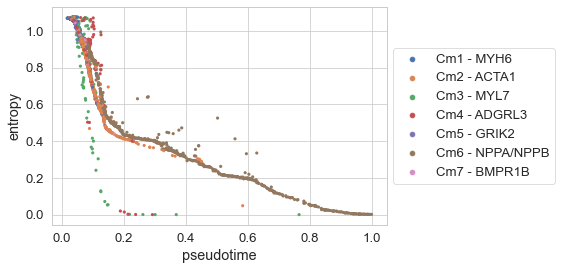

In [58]:
df_DCM = df[df["Condition"]=="DCM"]
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="ClusterName", data=df_DCM, s=10,linewidth=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_DCM.png', bbox_inches='tight')
#plt.show()

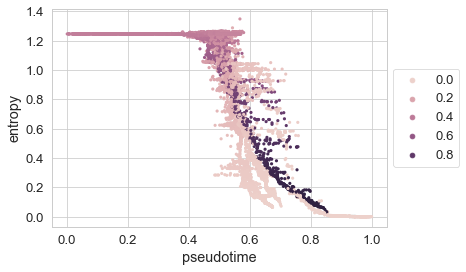

In [83]:
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="MonoD7_GTCACAACATGTCCTC-1", data=df, s=10,linewidth=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_BR4_prob.png', bbox_inches='tight')

In [59]:
pca_projections.to_csv('pca_projections.csv', index=True)
ms_data.to_csv('ms_data.csv', index=True)
tsne.to_csv('tsne.csv', index=True)
df.to_csv('palantir_meta_data.csv', index=True)

In [60]:
fdl.to_csv('fdl.csv',index=True)

In [3]:
df = pd.read_csv('/Users/jamrute/Documents/Graduate_School/Thesis_Lab/Lavine_Projects/Andrew_HDCM/Palantir/myeloid_single_cell/myeloid_palantir_meta_data.csv')

Text(0.5, 1.0, 'Cm4 - ADGRL3')

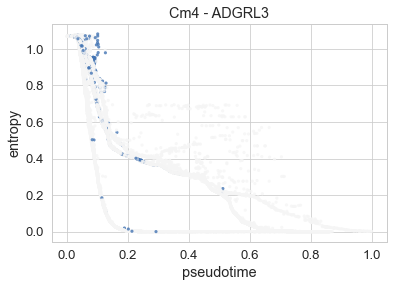

Text(0.5, 1.0, 'Cm6 - NPPA/NPPB')

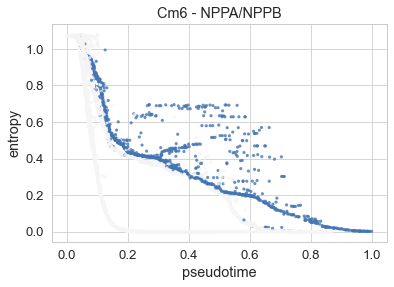

Text(0.5, 1.0, 'Cm7 - BMPR1B')

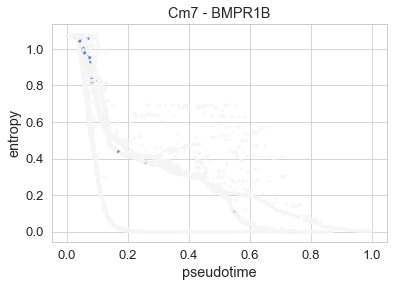

Text(0.5, 1.0, 'Cm2 - ACTA1')

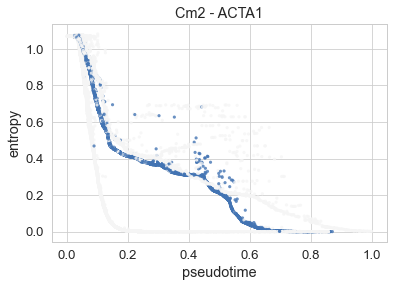

Text(0.5, 1.0, 'Cm1 - MYH6')

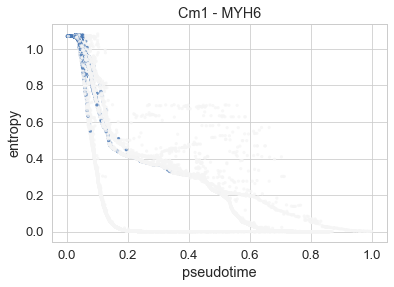

Text(0.5, 1.0, 'Cm3 - MYL7')

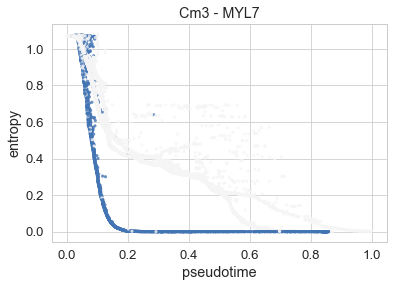

Text(0.5, 1.0, 'Cm5 - GRIK2')

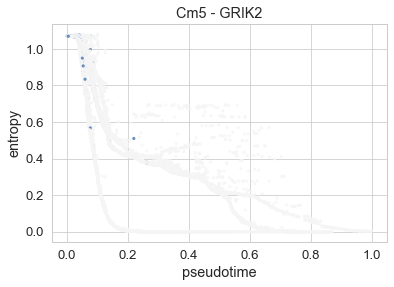

In [61]:
# Create an array with the colors you want to use
colors = ["whitesmoke", "#4374B3"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
i = 0
for cluster in list(set(df.ClusterName)):
    df['curr'] = df["ClusterName"]==cluster
    ax = sns.scatterplot(x="pseudotime", y="entropy", hue="curr", data=df, s=10,linewidth=0, alpha=0.8,
                        palette = customPalette, legend=False)
    plt.title(cluster)
    plt.savefig('pseudotime_entropy_' + str(i) +'.png', bbox_inches='tight')
    i+= 1
    plt.show()